## Introduction

Item based collaborative filtering is a memory-based algorithm for recommender engines. The underlying assumption of this approach is that if Item 1 and Item 3 are considered similar as they are positively rated by both User 1 and User 2. Thus, Item 1 can be recommended to User 3 as it already shows interest in Item 3.


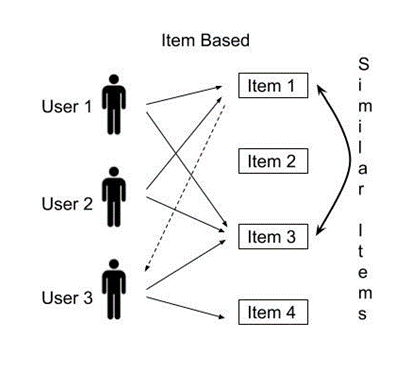

**Context**

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

**Business Problem**

Developing a recommendation system based on similarly rated films.

**Attribute Information**

The two files from the data will be used in this study as rating.csv and movie.csv

rating.csv that contains ratings of movies by users:

* userId
* movieId
* rating
* timestamp
movie.csv that contains movie information:

* movieId
* title
* genres

**Task Details**

**Step 1:** Preparing the Data Set

**Step 2:** Creating User Movie Df

**Step 3:** Making Item-Based Movie Suggestions

In [1]:
import pandas as pd
!pip install openpyxl

     |████████████████████████████████| 242 kB 888 kB/s            


In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

## Step 1: Preparing the Data Set

In [3]:
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
df = movie.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


## Step 2: Creating User Movie Df

Our main goal is to create the user_movie matrix with users in rows and movies in columns.

In [4]:
df.shape

(20000797, 6)

The total number of comments is 20000797

In [5]:
df["title"].nunique()

27262

The number of unique movies is 27262

In [6]:
rating_counts = pd.DataFrame(df["title"].value_counts())
rating_counts.head()

,title
Pulp Fiction (1994),67310
Forrest Gump (1994),66172
"Shawshank Redemption, The (1994)",63366
"Silence of the Lambs, The (1991)",63299
Jurassic Park (1993),59715


Here the number of comments per movie can be seen

Movies that do not receive much interaction can be excluded from the study in order to narrow the scope.

In [7]:
rare_movies = rating_counts[rating_counts["title"] <= 1000].index

common_movies = df[~df["title"].isin(rare_movies)]

common_movies.shape

(17766015, 6)

In [8]:
common_movies["title"].nunique()

3159

After narrowing the scope to movies with 1000 or more comments, the total number of comments is 17766015 and the total number of movies is 3159.

The next step is creating the user_movie matrix with users in rows and movies in columns.

In [9]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

user_movie_df.shape

(138493, 3159)

In [10]:
user_movie_df.head(10)

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Making Item-Based Movie Suggestions


Now that we have the user-movie matrix, we can calculate the correlations.
In user_movie_df the columns were the movie name, then if we fetch this column the user id-movie scores will come. This will be assigned to a variable named movie name.



In [11]:
movie_name = "Matrix, The (1999)"
movie_name = user_movie_df[movie_name]

There is only the matrix movie and the points given to it. The next step is to look at the correlation between this movie and other movies.

In [12]:
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
Matrix, The (1999)                                           1.000000
Matrix Reloaded, The (2003)                                  0.516906
Matrix Revolutions, The (2003)                               0.449588
Animatrix, The (2003)                                        0.367151
Blade (1998)                                                 0.334493
Terminator 2: Judgment Day (1991)                            0.333882
Minority Report (2002)                                       0.332434
Edge of Tomorrow (2014)                                      0.326762
Mission: Impossible (1996)                                   0.320815
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.318726
dtype: float64

The first movie is the movie we are looking for similar ones, so we are listing the movies other than that.

Below are the top five movies recommended by the item-based recommendation system for The Matrix movie.

In [13]:
user_movie_df.corrwith(movie_name).sort_values(ascending=False)[1:6]

title
Matrix Reloaded, The (2003)          0.516906
Matrix Revolutions, The (2003)       0.449588
Animatrix, The (2003)                0.367151
Blade (1998)                         0.334493
Terminator 2: Judgment Day (1991)    0.333882
dtype: float64